The dataset can be downloaded from the link below
- https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

# Data Understanding

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
#reading and displaying the first five rows of the dataset
airlines = pd.read_csv('airlines.csv')
airlines.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [3]:
#checking on the type of  the dataset
type(airlines)

pandas.core.frame.DataFrame

In [4]:
#checking the number of rows and columns
airlines.shape

(539382, 8)

In [5]:
#checing if there are any missing values presented in the dataset
airlines.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [6]:
#checking for the unique values in each columns
uniqueValues = airlines.nunique()
print(uniqueValues)

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64


# Exploratory Data Analysis

In [7]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn

Text(0.5, 1.0, 'Count of Class')

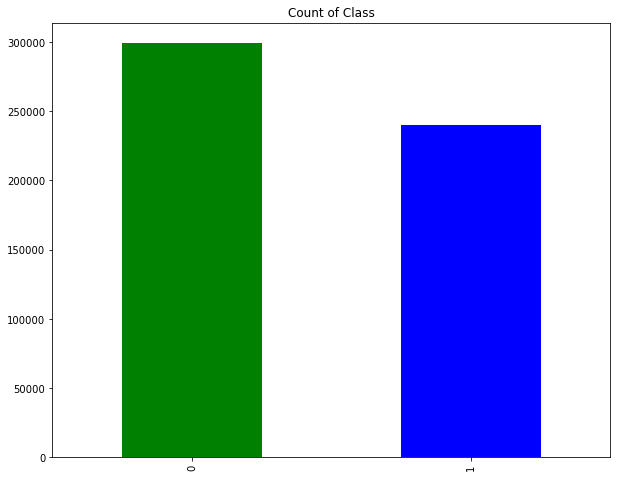

In [8]:
airline_class = airlines['Class'].value_counts()
airline_class.plot(kind = 'bar', color= ['green', 'blue'], figsize = (10,8))
plt.title('Count of Class')

Text(0.5, 1.0, 'Count of Airlines')

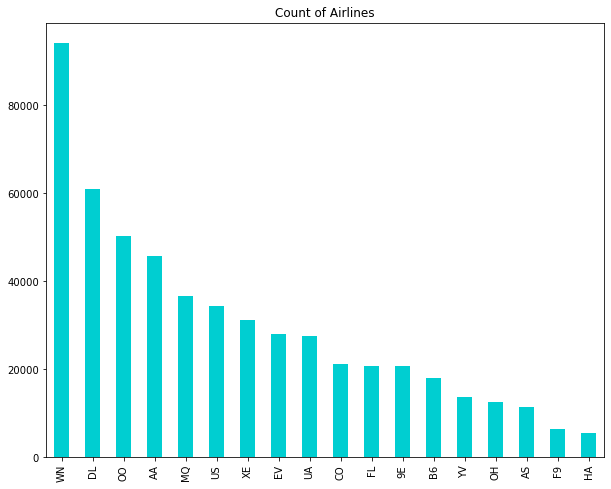

In [9]:
airline_ID = airlines['Airline'].value_counts()
airline_ID.plot(kind = 'bar', color ='darkturquoise', figsize = (10,8))
plt.title('Count of Airlines')

- WN airlines is the most frequently used airlines.

In [10]:
airlines_count = airlines.groupby(['Airline', 'Class']).size().unstack(fill_value=0)
airlines_count

Class,0,1
Airline,,
9E,12460,8226
AA,27920,17736
AS,7579,3892
B6,9653,8459
CO,9161,11957
DL,33488,27452
EV,16728,11255
F9,3557,2899
FL,14552,6275


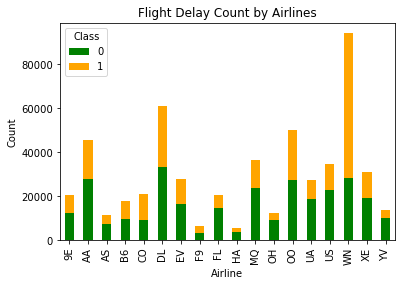

In [11]:
airlines_count.plot(kind='bar', stacked=True, color=['green','orange'])
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flight Delay Count by Airlines')
plt.legend(title='Class', labels=['0', '1'])
plt.show()

- WN airlines have the most delayed flights.

In [12]:
airlines_days_count = airlines.groupby(['DayOfWeek', 'Class']).size().unstack(fill_value=0)
airlines_days_count

Class,0,1
DayOfWeek,,
1,38739,34030
2,39427,31913
3,47492,42254
4,50201,41244
5,49732,35515
6,35341,23615
7,38186,31693


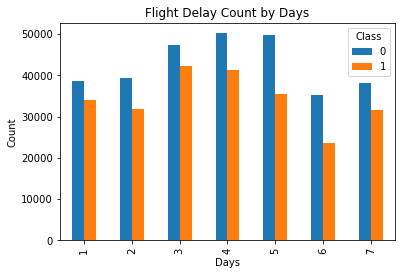

In [13]:
airlines_days_count.plot(kind='bar', stacked=False)
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Flight Delay Count by Days')
plt.legend(title='Class', labels=['0', '1'])
plt.show()

- Most delayed flights are on the 3rd day. 

# Data Pre-processing

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
columns = ['Airline', 'AirportFrom', 'AirportTo']
label_encoder = LabelEncoder()
for col in columns:
    airlines[col + '_encoded'] = label_encoder.fit_transform(airlines[col])
airlines = airlines.drop(columns=columns)

In [16]:
airlines.head()

,Flight,Time,Length,DayOfWeek,Class,Airline_encoded,AirportFrom_encoded,AirportTo_encoded
0,2313.0,1296.0,141.0,1,0,5,16,129
1,6948.0,360.0,146.0,4,0,12,65,208
2,1247.0,1170.0,143.0,3,0,3,35,60
3,31.0,1410.0,344.0,6,0,14,203,217
4,563.0,692.0,98.0,4,0,8,32,16


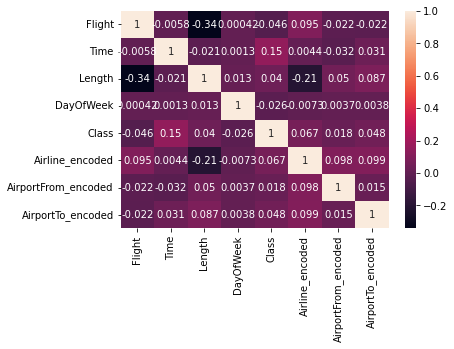

In [17]:
corr_matrix = airlines.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

# Modelling

In [18]:
X = airlines.drop('Class', axis=1)
Y = airlines['Class']

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=123, test_size=0.2)

In [20]:
Xtrain.shape

(431505, 7)

In [21]:
Xtest.shape

(107877, 7)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtrain

array([[ 0.74537061,  1.82739553, -0.5307956 , ..., -1.75772924,
         0.04898979, -1.66356041],
       [-0.44885519, -1.14199233,  0.9092383 , ..., -0.81567548,
        -1.53899948, -0.50382518],
       [-0.88047975, -0.63809621, -1.10110606, ...,  1.06843202,
         0.81777824, -1.24756843],
       ...,
       [ 0.24164733,  0.94557732, -0.40247575, ...,  1.25684277,
        -1.61461801, -1.0836928 ],
       [ 0.32681092, -1.15998862, -0.60208441, ...,  1.25684277,
         0.32625775, -0.11304483],
       [-0.93757807,  1.12554022,  0.75240293, ..., -1.56931848,
         0.90599987,  0.49203442]])

In [24]:
Xtest = scaler.transform(Xtest)
Xtest

array([[-0.63079559, -1.32195523,  0.01099933, ...,  0.88002127,
         0.35146393, -1.05848116],
       [ 0.21745313, -0.24217783, -0.5307956 , ...,  0.12637827,
         1.23368019, -0.80636481],
       [-0.81999425, -0.03702012,  0.21060799, ...,  0.69161052,
         0.80517515,  0.03822498],
       ...,
       [-0.36756268,  0.96357361, -0.17435157, ...,  0.88002127,
        -1.06008208,  1.56352893],
       [ 1.37538763,  1.01756248, -0.47376456, ..., -0.62726473,
        -0.83322647, -0.91981717],
       [ 0.17341968, -0.33215928,  0.60982531, ...,  1.06843202,
        -0.50554615,  0.90802641]])

### Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB 
model_NB = GaussianNB()                       
model_NB.fit(Xtrain, Ytrain)                  
NB_model = model_NB.predict(Xtest)             

In [26]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Ytest, NB_model)
acc1

0.5857133587326306

### Random Forest 

In [27]:
from sklearn.ensemble import RandomForestClassifier 
model_RF = RandomForestClassifier()                       
model_RF.fit(Xtrain, Ytrain)                  
RF_model = model_RF.predict(Xtest) 

In [28]:
acc2 = accuracy_score(Ytest, RF_model)
acc2

0.6176756861981701

### Logistic Regression

In [29]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model_LR = linear_model.LogisticRegression()
model_LR.fit(Xtrain, Ytrain)
LR_model = model_LR.predict(Xtest)

In [30]:
acc3 = accuracy_score(Ytest, LR_model)
acc3

0.5817087979828879

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(Xtrain, Ytrain)
DT_model = model_DT.predict(Xtest)

In [32]:
acc4 = accuracy_score(Ytest, DT_model)
acc4

0.6084429489140409

### K-Nearest Neighbour

In [33]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtrain,Ytrain)
 pred_i = knn.predict(Xtest)
 error_rate.append(np.mean(pred_i != Ytest))

Text(0, 0.5, 'Error Rate')

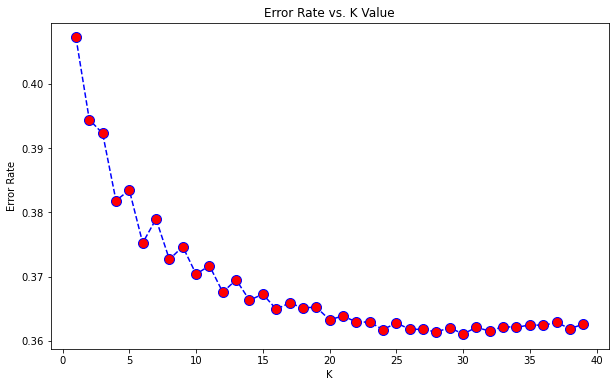

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Maximum accuracy: 0.6389406453646282 at K = 30


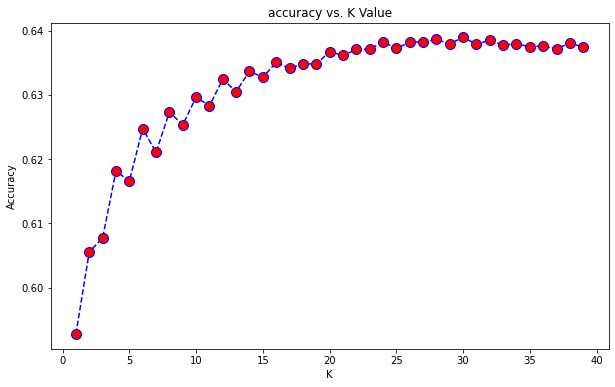

In [35]:
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(Xtrain,Ytrain)
    yhat = neigh.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
max_accuracy = max(acc)
optimal_k_value = acc.index(max_accuracy) + 1
print("Maximum accuracy:",max_accuracy,"at K =", optimal_k_value)

- The optimal k-value is 30.

In [36]:
knn = KNeighborsClassifier(n_neighbors=30)
model_KNN = knn.fit(Xtrain, Ytrain)
KNN_model = knn.predict(Xtest)

In [37]:
acc5 = accuracy_score(Ytest, KNN_model)
acc5

0.6389406453646282

# Evaluation

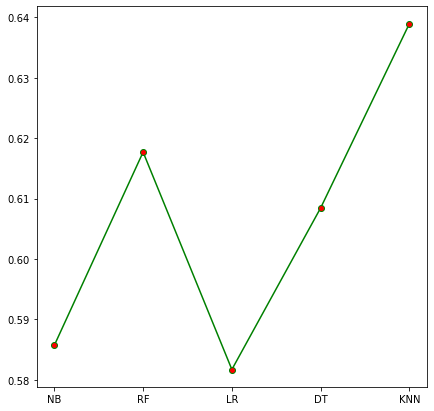

In [38]:
plt.rcParams["figure.figsize"] = [7,7]
acc = [acc1, acc2, acc3, acc4, acc5]
models = ['NB', 'RF', 'LR', 'DT', 'KNN']

plt.plot(models,acc, color = 'green', marker = 'o', markerfacecolor = 'red')
plt.grid(False)
plt.show()

- KNN is the best performing model with an accuracy of 63.89%